## MP Phase 1

**S11 - Group x**

**Submitted By:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**Chua Ching, Janine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Ileto, Maxine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Dytoc, Ayisha**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Tan, Jared**

# Introduction

## Target Task

# Dataset Description

## Brief Description

## Data Collection Process


## Dataset Features


## Dataset Variables

The dataset contains a total of 20 variables (columns). The following are the descriptions of each variable in the dataset:

- **`uuid`**: The unique identifier of the snapshot
- **`current_minute`**: The current minute of the in-play match. Important: the 15 min half-time break is included, so a match will have a total of 105 min. A current_minute of 70 corresponds to the actual match time of 55.
- **`home_score`**: Goals scored by the home team as of this current_minute
- **`away_score`**:  Goals scored by the away team as of this current_minute
- **`home_yellow_cards`**: Yellow cards given to the home team as of this current_minute
- **`away_yellow_cards`**: Yellow cards given to the away team as of this current_minute
- **`home_red_cards`**: Red cards given to the home team as of this current_minute
- **`away_red_cards`**: Red cards given to the away team as of this current_minute
- **`home_attacks`**: Attacks attempted by the home team as of this current_minute
- **`away_attacks`**: Attacks attempted by the away team as of this current_minute
- **`home_dangerous_attacks`**: Dangerous attacks attempted by the home team as of this current_minute
- **`away_dangerous_attacks`**: Dangerous attacks attempted by the away team as of this current_minute
- **`home_corners`**: Corners awarded to the home team as of this current_minute
- **`away_corners`**: Corners awarded to the away team as of this current_minute
- **`home_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the home team as of this current_minute
- **`away_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the away team as of this current_minute
- **`home_on_target`**:  Shots that had to be cleared by the goalkeeper that were attempted to 
the home team as of this current_minute
- **`away_on_target`**: Shots that had to be cleared by the goalkeeper that were attempted to 
the away team as of this current_minute
- **`home_possession`**: How much ball possession in % did the home team have until this 
current_minute
- **`away_possession`**: The unique identifier of the snapshot

# List of requirements

List all python libraries and modules used

In [20]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing and cleaning

Check csmodel file for examples

Below is a sample of the first 5 rows of the dataset

In [2]:
df = pd.read_csv('sports.csv')
df.head()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0


Check if any missing values

In [3]:
df.isnull().any()

uuid                      False
current_minute            False
home_score                False
away_score                False
home_yellow_cards         False
away_yellow_cards         False
home_red_cards            False
away_red_cards            False
home_attacks              False
away_attacks              False
home_dangerous_attacks    False
away_dangerous_attacks    False
home_corners              False
away_corners              False
home_off_target           False
away_off_target           False
home_on_target            False
away_on_target            False
home_possession           False
away_possession           False
final_delta               False
dtype: bool

Verify data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    7000 non-null   object
 1   current_minute          7000 non-null   int64 
 2   home_score              7000 non-null   int64 
 3   away_score              7000 non-null   int64 
 4   home_yellow_cards       7000 non-null   int64 
 5   away_yellow_cards       7000 non-null   int64 
 6   home_red_cards          7000 non-null   int64 
 7   away_red_cards          7000 non-null   int64 
 8   home_attacks            7000 non-null   int64 
 9   away_attacks            7000 non-null   int64 
 10  home_dangerous_attacks  7000 non-null   int64 
 11  away_dangerous_attacks  7000 non-null   int64 
 12  home_corners            7000 non-null   int64 
 13  away_corners            7000 non-null   int64 
 14  home_off_target         7000 non-null   int64 
 15  away

Check if there are any default values for integer values

In [5]:
df_integer_variables = df.drop('uuid',axis=1)
df_integer_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_yellow_cards       7000 non-null   int64
 4   away_yellow_cards       7000 non-null   int64
 5   home_red_cards          7000 non-null   int64
 6   away_red_cards          7000 non-null   int64
 7   home_attacks            7000 non-null   int64
 8   away_attacks            7000 non-null   int64
 9   home_dangerous_attacks  7000 non-null   int64
 10  away_dangerous_attacks  7000 non-null   int64
 11  home_corners            7000 non-null   int64
 12  away_corners            7000 non-null   int64
 13  home_off_target         7000 non-null   int64
 14  away_off_target         7000 non-null   int64
 15  home_on_target       

do this by checking if any negative values

In [6]:
(df_integer_variables.values <= 0).any()

True

As you can see, current_minute's minimum value is below 0, which is invalid

In [7]:
df_integer_variables.describe()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,59.491571,0.796000,0.623143,0.522429,0.603143,0.009286,0.015714,46.365429,43.325143,27.611429,24.201286,2.377714,1.994286,3.067857,2.592286,2.172143,1.796000,51.584286,48.412571,1.416857
std,35.827892,1.070503,0.923248,0.922212,1.018021,0.097399,0.125520,36.004908,33.428276,22.977844,20.457007,2.464647,2.197746,3.157366,2.747621,2.320374,2.026002,10.532584,10.534579,1.419035
min,-348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,14.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,42.000000,0.000000
50%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,41.000000,25.000000,21.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,51.000000,49.000000,1.000000
75%,88.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,71.000000,67.000000,42.000000,36.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000,58.000000,54.000000,2.000000
max,583.000000,8.000000,9.000000,8.000000,8.000000,2.000000,2.000000,255.000000,183.000000,134.000000,140.000000,16.000000,18.000000,24.000000,18.000000,22.000000,19.000000,100.000000,100.000000,10.000000


Let's get the total number of rows with negative values for current_minute

In [11]:
(df_integer_variables['current_minute'] < 0 ).sum()

14

We will now remove all df rows with negative values for current_minute

In [13]:
df = df[ df['current_minute'] >= 0 ]
len(df)

6986

As you can see, the 14 rows with negative values were now removed

we will now drop all duplicates

In [14]:
df.drop_duplicates()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,838f35c5-afa3-474b-876e-063fd49d4326,32,0,0,0,0,0,0,16,25,...,13,0,1,1,2,0,1,45,55,0
6996,4bcfd248-5f39-4af2-b465-5358c9e7088e,101,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,50,50,0
6997,deccdc2c-625e-495a-9b06-02d540d4cd24,78,1,0,0,0,0,0,71,60,...,40,7,0,5,5,7,0,61,39,2
6998,94a20308-55d8-47cb-8f8b-d2702a531c74,72,2,0,0,0,0,0,85,66,...,20,3,0,4,1,2,1,52,48,0


The number of rows did not change, indicating that there are no duplicates

In [18]:
end_game_df = df[ df['current_minute'] == 105 ]
len(end_game_df)

55

# Exploratory Data Analysis

What is the distribution of the current minutes?

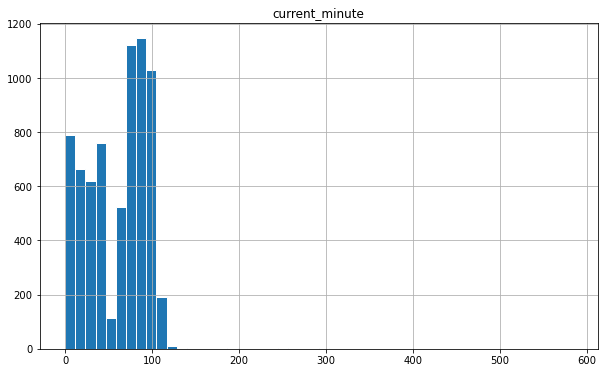

In [24]:
minutes_df = df[["uuid", "current_minute"]]
minutes_df.hist("current_minute", bins=50, edgecolor='w', figsize=(10,6))
plt.show()

# Model training

# Hyperparameter tuning

# Model selection

# Insights and conclusions

# Bibliography
